In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go

sb.set()

In [7]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [2]:
df_final_up = pd.read_csv("upsampled-heart-disease.csv")
df_final_down = pd.read_csv("downsampled-heart-disease.csv")

## Upsampled balance dataframe

###  Creation of second decision tree classification model

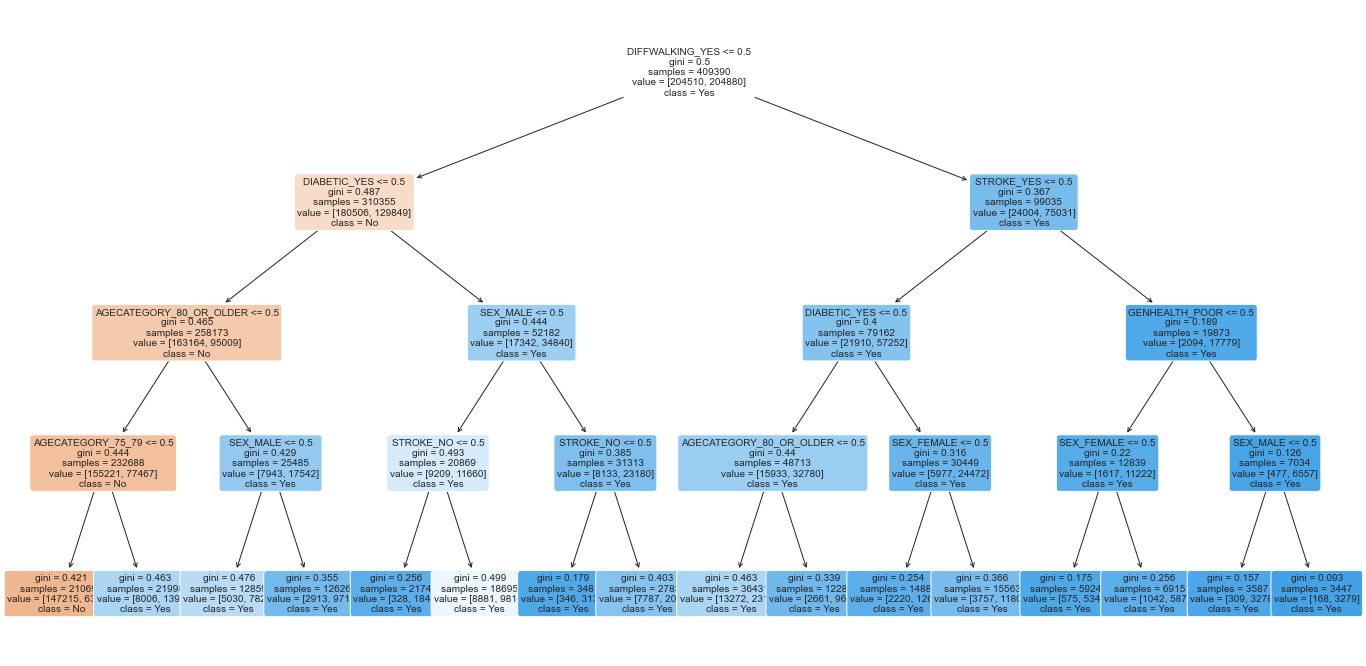

In [66]:
# Extract Response and Predictors
y = pd.DataFrame(df_final_up['HEARTDISEASE'])
X = pd.DataFrame(df_final_up.drop('HEARTDISEASE', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2889)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No","Yes"], fontsize=10)
plt.savefig('tree_high_dpi', dpi=100)
plt.show()

### Analysis of decision tree classification model after upsampling

Train Data
Accuracy  :	 0.7050001221329295

TPR Train :	 0.6901844982428739
TNR Train :	 0.7198425504865288

FPR Train :	 0.2801574495134712
FNR Train :	 0.30981550175712613


<AxesSubplot:>

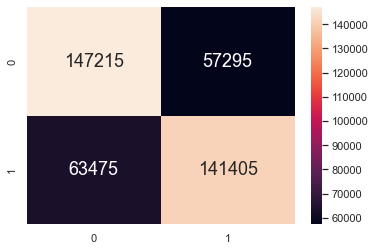

In [67]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Yes (1) predicted Yes (1)
fpTrain = cmTrain[0][1] # False Positives : No (0) predicted Yes (1)
tnTrain = cmTrain[0][0] # True Negatives : No (0) predicted No (0)
fnTrain = cmTrain[1][0] # False Negatives : Yes (1) predicted No (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7051648865229633

TPR Test :	 0.6920678074524228
TNR Test :	 0.7182068432068432

FPR Test :	 0.2817931567931568
FNR Test :	 0.30793219254757714


<AxesSubplot:>

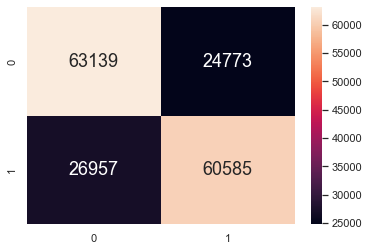

In [68]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Yes (1) predicted Yes (1)
fpTest = cmTest[0][1] # False Positives : No (0) predicted Yes (1)
tnTest = cmTest[0][0] # True Negatives : No (0) predicted No (0)
fnTest = cmTest[1][0] # False Negatives : Yes (1) predicted No (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Creation of third classification model: Random Forest (on Upsampled balanced dataframe)

In [69]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.HEARTDISEASE.ravel())

RandomForestClassifier(max_depth=4)

### Analysis of random classification model on upsampled dataframe

Train Data
Accuracy  :	 0.7095605657197294

TPR Train :	 0.6407897305739946
TNR Train :	 0.7784558212312357

FPR Train :	 0.22154417876876437
FNR Train :	 0.3592102694260055


<AxesSubplot:>

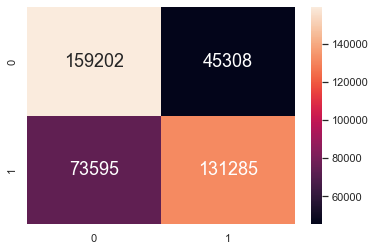

In [70]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Yes (1) predicted Yes (1)
fpTrain = cmTrain[0][1] # False Positives : No (0) predicted Yes (1)
tnTrain = cmTrain[0][0] # True Negatives : No (0) predicted No (0)
fnTrain = cmTrain[1][0] # False Negatives : Yes (1) predicted No (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7106307066239584

TPR Test :	 0.6425372963834503
TNR Test :	 0.7784375284375284

FPR Test :	 0.22156247156247155
FNR Test :	 0.35746270361654975


<AxesSubplot:>

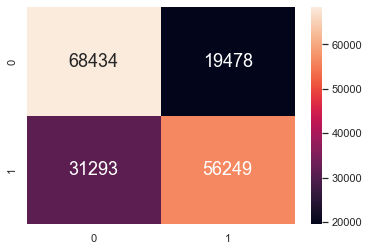

In [71]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Yes (1) predicted Yes (1)
fpTest = cmTest[0][1] # False Positives : No (0) predicted Yes (1)
tnTest = cmTest[0][0] # True Negatives : No (0) predicted No (0)
fnTest = cmTest[1][0] # False Negatives : Yes (1) predicted No (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

By carrying out random forest and nothing else, our model may not present the best accuracy. Though increasing the number of trees and the depth of trees may increase the accuracy, blindly increasing may widen the gap between the performance on the train and test sets. This is an indication of overfitting the train set, which is when our model fits exactly against its training data, but cannot perform accurately against unseen data, defeating its purpose. Thus we need to find the optimal hyper-parameters to mazimize accuracy of the our model on the test set. To do this, we will use Cross-validation and Tune Hyper-parameters for our model


### Modifying the model: Random Forest with Cross-validation (on Upsampled balanced dataframe)

In [72]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees between 100 and 1000, as this is proven to yeild the best results
              'max_depth': np.arange(2, 11)}             # depth of trees between 2 and 10, as this is proven to yeild the best results. 
                                                         # (Too much may lead to overfitting)

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 3,                     # 3-fold cross-validation
                      scoring = 'accuracy',       # score to evaluate
                      n_jobs= -1)       

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.HEARTDISEASE.ravel())
#%time grid.fit(X_train, y_train.HEARTDISEASE.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [73]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=600)
0.7603678685692651


In [74]:
def calculateF1Positive (TP, TN, FP, FN):
    F1= TP/(TP+0.5*(FP+FN))
    return F1

def calculateF1Negative(TP, TN, FP, FN):
    F1=TN/(TN+0.5*(FP+FN))
    return F1

### Creating the new model based on cross-validation for Upsampled dataframe

In [78]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(df_final_up['HEARTDISEASE'])
X = pd.DataFrame(df_final_up.drop('HEARTDISEASE', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 600,   # found using GridSearchCV
                                 max_depth = 10)       # found using GridSearchCV

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.HEARTDISEASE.ravel())

RandomForestClassifier(max_depth=10, n_estimators=600)

### Analyse the model after cross-validation for the Upsampled dataframe

Train Data
Accuracy  :	 0.7599697110334889

TPR Train :	 0.7577888661365758
TNR Train :	 0.7621489371053518

FPR Train :	 0.23785106289464816
FNR Train :	 0.24221113386342422
F1 for positive result: 	 0.7593772497318687
F1 for negative result: 	 0.7605592619847076


<AxesSubplot:>

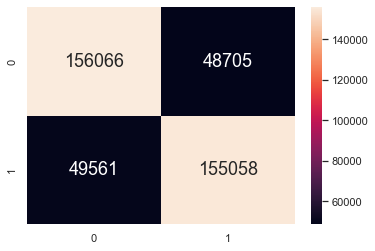

In [79]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors      #For train data
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

print("F1 for positive result: \t", calculateF1Positive(tpTrain, tnTrain, fpTrain, fnTrain))  #F1 from 0-1, 1 best
print("F1 for negative result: \t", calculateF1Negative(tpTrain, tnTrain, fpTrain, fnTrain))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7592873345720246

TPR Test :	 0.7586756716740886
TNR Test :	 0.759900058185303

FPR Test :	 0.24009994181469693
FNR Test :	 0.2413243283259114
F1 for positive result: 	 0.7593772497318687
F1 for negative result: 	 0.7605592619847076


<AxesSubplot:>

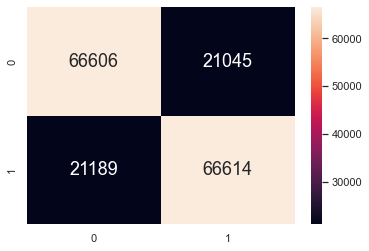

In [80]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors        #for test data
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

print("F1 for positive result: \t", calculateF1Positive(tpTrain, tnTrain, fpTrain, fnTrain))    #F1 from 0-1, 1 best
print("F1 for negative result: \t", calculateF1Negative(tpTrain, tnTrain, fpTrain, fnTrain))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Downsampled dataframe

###  Creation of second decision tree classification model

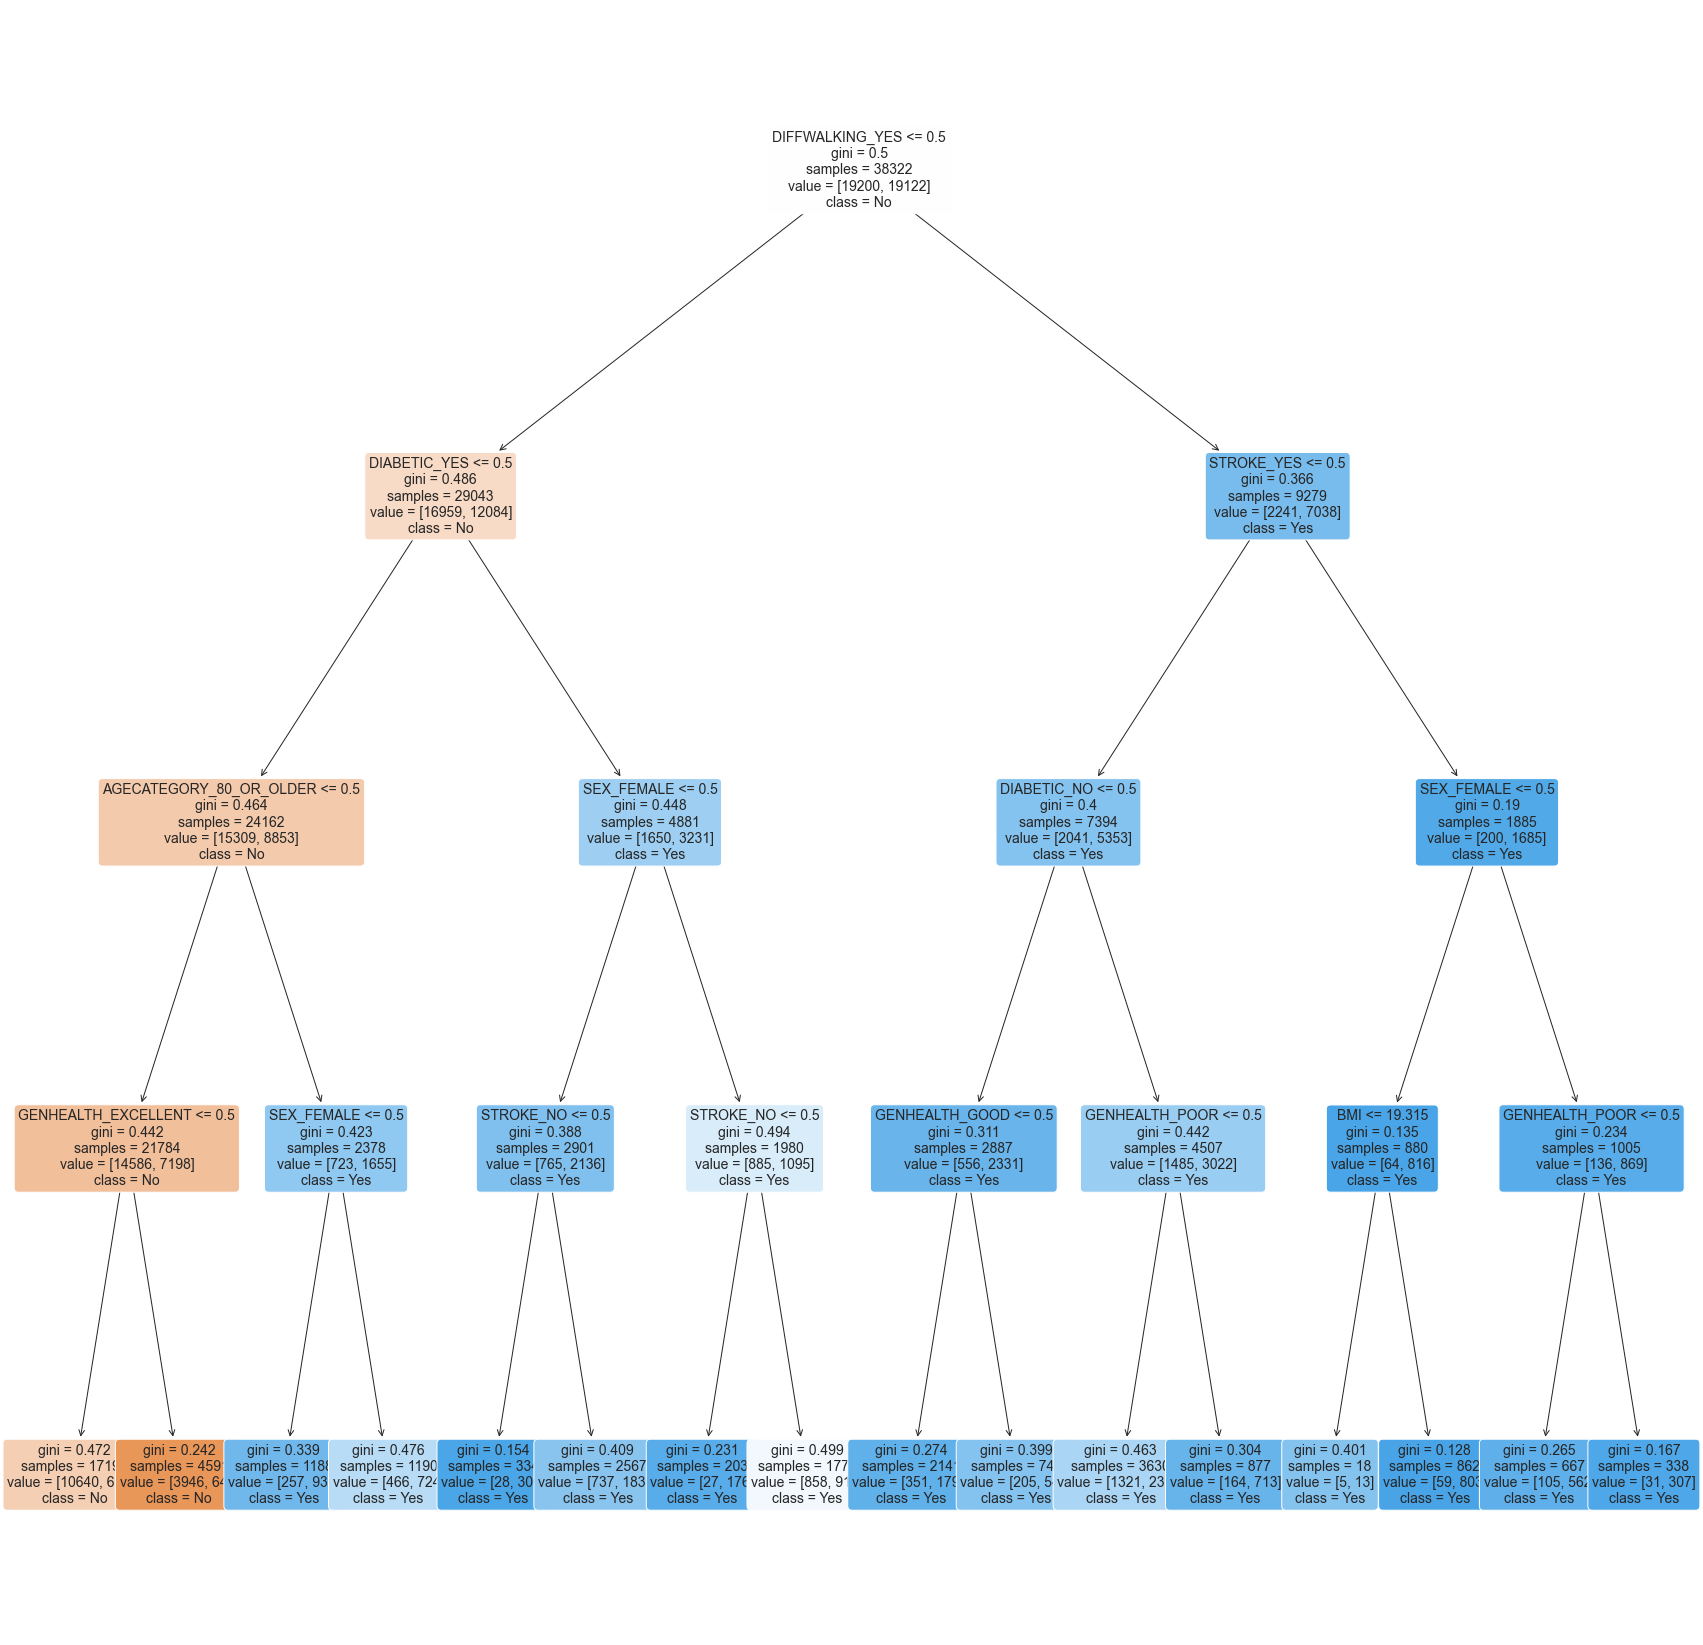

In [51]:
# Extract Response and Predictors
y = pd.DataFrame(df_final_down['HEARTDISEASE'])
X = pd.DataFrame(df_final_down.drop('HEARTDISEASE', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(30,30))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No","Yes"], fontsize=14)
plt.savefig('tree_high_dpi', dpi=100)
plt.show()

### Analysis of decision tree classification model after downsampling

Train Data
Accuracy  :	 0.6917697406189656

TPR Train :	 0.6235749398598472
TNR Train :	 0.7596875

FPR Train :	 0.2403125
FNR Train :	 0.3764250601401527


<AxesSubplot:>

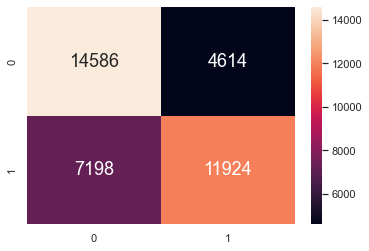

In [52]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Yes (1) predicted Yes (1)
fpTrain = cmTrain[0][1] # False Positives : No (0) predicted Yes (1)
tnTrain = cmTrain[0][0] # True Negatives : No (0) predicted No (0)
fnTrain = cmTrain[1][0] # False Negatives : Yes (1) predicted No (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6893570384802727

TPR Test :	 0.6207732396073203
TNR Test :	 0.7585953750152943

FPR Test :	 0.24140462498470575
FNR Test :	 0.37922676039267966


<AxesSubplot:>

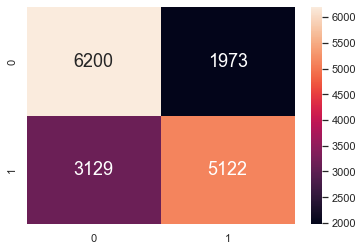

In [53]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Yes (1) predicted Yes (1)
fpTest = cmTest[0][1] # False Positives : No (0) predicted Yes (1)
tnTest = cmTest[0][0] # True Negatives : No (0) predicted No (0)
fnTest = cmTest[1][0] # False Negatives : Yes (1) predicted No (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Creation of third classification model: Random Forest (on Downsampled balanced dataframe)

In [54]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.HEARTDISEASE.ravel())

RandomForestClassifier(max_depth=4)

### Analysis of random forest classification model on downsampled dataframe

Train Data
Accuracy  :	 0.711862637649392

TPR Train :	 0.6439180002091831
TNR Train :	 0.77953125

FPR Train :	 0.22046875
FNR Train :	 0.35608199979081684


<AxesSubplot:>

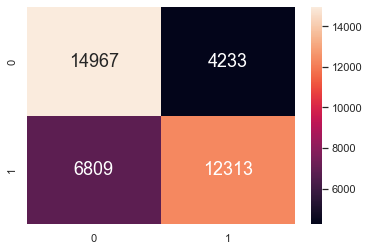

In [55]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7106064296151973

TPR Test :	 0.6394376439219489
TNR Test :	 0.7824544231004527

FPR Test :	 0.2175455768995473
FNR Test :	 0.36056235607805115


<AxesSubplot:>

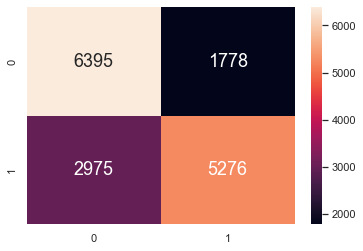

In [56]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Modifying the model: Random Forest with Cross-validation (on DownSampled balanced dataframe)

In [57]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees
              'max_depth': np.arange(2, 11)}             # depth of trees

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 3,                     # 3-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.HEARTDISEASE.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [58]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=500)
0.755127602943479


In [59]:
def calculateF1Positive (TP, TN, FP, FN):
    F1= TP/(TP+0.5*(FP+FN))
    return F1

def calculateF1Negative(TP, TN, FP, FN):
    F1=TN/(TN+0.5*(FP+FN))
    return F1

### Creating the new model based on cross-validation for Downsampled dataframe

In [63]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(df_final_up['HEARTDISEASE'])
X = pd.DataFrame(df_final_up.drop('HEARTDISEASE', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 500,   # found using GridSearchCV
                                 max_depth = 10)       # found using GridSearchCV

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.HEARTDISEASE.ravel())

RandomForestClassifier(max_depth=10, n_estimators=500)

### Analyse the model after cross-validation for Downsampled dataframe

Train Data
Accuracy  :	 0.7620386428588876

TPR Train :	 0.7623850025188178
TNR Train :	 0.7616930741866695

FPR Train :	 0.23830692581333046
FNR Train :	 0.23761499748118223
F1 for positive result: 	 0.7619136066475225
F1 for negative result: 	 0.7621635478082543


<AxesSubplot:>

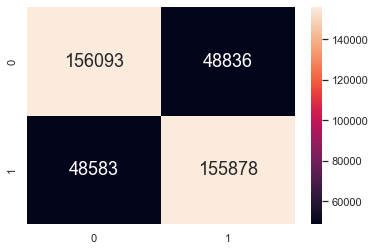

In [64]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors      #For train data
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

print("F1 for positive result: \t", calculateF1Positive(tpTrain, tnTrain, fpTrain, fnTrain))  #F1 from 0-1, 1 best
print("F1 for negative result: \t", calculateF1Negative(tpTrain, tnTrain, fpTrain, fnTrain))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7577769671822814

TPR Test :	 0.7570514205159105
TNR Test :	 0.7585063947972981

FPR Test :	 0.24149360520270194
FNR Test :	 0.24294857948408954
F1 for positive result: 	 0.7619136066475225
F1 for negative result: 	 0.7621635478082543


<AxesSubplot:>

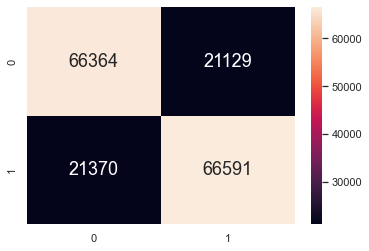

In [65]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors        #for test data
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

print("F1 for positive result: \t", calculateF1Positive(tpTrain, tnTrain, fpTrain, fnTrain))    #F1 from 0-1, 1 best
print("F1 for negative result: \t", calculateF1Negative(tpTrain, tnTrain, fpTrain, fnTrain))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Identifying which model is the best:

After optimization by fine-tuning hyperparameters of the RandomForest Classification Machine Learning Model using grid-search, we found that: 

#### 1) Upsampling to balance the imbalance of the response variable "HeartDisease" yeilded the better results than downsampling. This can be seen in the analysis of random forest and cross-validation for the Upsampling and Downsampling datasets.
Random Forest Results:

Upsampling Goodness of fit (train data): 0.717

Downsampling Goodness of fit (train data): 0.705

Upsampling False Postitive Rate (test data): 0.231

Downsampling False Postitive Rate (test data): 0.228

Upsampling False Negative Rate (test data): 0.337

Downsampling False Negative Rate (test data): 0.374

#### The Cross-validation showed improvements:
    
Upsampling Goodness of fit (train data): 0.760

Downsampling Goodness of fit (train data): 0.760

Upsampling False Postitive Rate (test data): 0.241

Downsampling False Postitive Rate (test data): 0.240

Upsampling False Negative Rate (test data): 0.241

Downsampling False Negative Rate (test data): 0.243

#### Further analysis
The data shows that the upsampling dataset is a better model at predicting heart disease. After cross-validation, though the False Positive Rate has inreased slightly, the accuracy and False Negative rate has improved a lot more. Furthermore, reducing the False Negative Rate is the outcome that we want in this project. This means lesser patients will be tested negative when they actually have heart disease. This will thus improve early detection and more patients can be treated. 